In [2]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
epi = pd.read_csv('/Users/justinsmith/Documents/GitHub/epi_r.csv')

In [4]:
epi.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
epi.rating.describe()

count    20052.000000
mean         3.714467
std          1.340829
min          0.000000
25%          3.750000
50%          4.375000
75%          4.375000
max          5.000000
Name: rating, dtype: float64

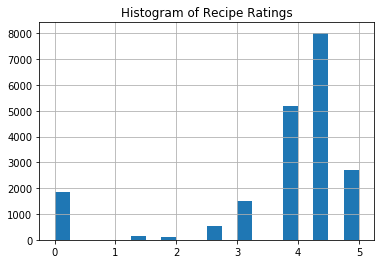

In [6]:
epi.rating.hist(bins=20)
plt.title('Histogram of Recipe Ratings')
plt.show()

In [7]:
null_count = epi.isnull().sum()
null_count[null_count>0]

calories    4117
protein     4162
fat         4183
sodium      4119
dtype: int64

In [8]:
from sklearn.svm import SVR
svr = SVR()
X = epi.drop(['rating', 'title', 'calories', 'protein', 'fat', 'sodium'], 1)
Y = epi.rating
svr.fit(X,Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [9]:
epi.tail()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
20047,Parmesan Puffs,3.125,28.0,2.0,2.0,64.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20048,Artichoke and Parmesan Risotto,4.375,671.0,22.0,28.0,583.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20049,Turkey Cream Puff Pie,4.375,563.0,31.0,38.0,652.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
20050,Snapper on Angel Hair with Citrus Cream,4.375,631.0,45.0,24.0,517.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20051,Baked Ham with Marmalade-Horseradish Glaze,4.375,560.0,73.0,10.0,3698.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
epi['bool_rate'] = epi['rating'].apply(lambda x: 1 if x >= 3.5 else 0)

In [27]:
y_bool = epi['bool_rate']
X_bool = epi.drop(['bool_rate', 'rating', 'title'], 1)
epi = epi.dropna()
epi.shape

(15864, 681)

In [28]:
svr.fit(X_bool,y_bool)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [30]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X_bool, y_bool, cv=3)

array([-0.01470184, -0.02396131, -0.03844651])

In [31]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)
pca.fit(X_bool)
X_pca = pca.transform(X_bool)

In [33]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_pca,y_bool)
svc.score(X_pca,y_bool)

0.9592158345940495

That looks pretty good.

In [49]:
keywords = X_bool.sum().sort_values(ascending=False)

In [50]:
keywords = keywords[:34].index.tolist()

In [51]:
# Create new feature dataframe
X_keywords = X_bool[keywords]

X_keywords.head()

,calories,sodium,fat,protein,bon appétit,peanut free,soy free,gourmet,tree nut free,vegetarian,...,dinner,onion,milk/cream,sauté,tomato,vegetable,fruit,vegan,egg,herb
0,426.0,559.0,7.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
1,403.0,1439.0,23.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,165.0,165.0,7.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,547.0,452.0,32.0,20.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,948.0,1042.0,79.0,19.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
svc.fit(X_keywords,y_bool)
svc.score(X_keywords, y_bool)

0.9524079677256682

In [55]:
cross_val_score(svc, X_keywords, y_bool, cv=5)

array([0.82634731, 0.82225024, 0.82288055, 0.82540183, 0.82471627])

In [56]:
cross_val_score(svc, X_pca, y_bool, cv=5)

array([0.82823826, 0.82382603, 0.82382603, 0.82697762, 0.82912989])

These seem to work similarly well. I hypothesis this meaning there is probably a lot of overlap in the two choice sets. Part of the reason for this is that people self select the recipes they are going to make. The people who are looking for these keywords and are likely to write the reviews look up the same or similar thing frequently. Therefore, you could also say, and it probably be more accurate to say, that people who use this website frequently enjoy dishes with these in